In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite
/kaggle/input/iris-flower-dataset/IRIS.csv


**Importing important Lib**

In [77]:

import pandas as pd                 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [78]:
#Reading the data
df=pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**As we can see we do not have any null values in the data**

In [80]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**From the above we can see as 50% of our data doesnot matches with mean of the data so there must be outliers that we need to take care of that**

<BarContainer object of 3 artists>

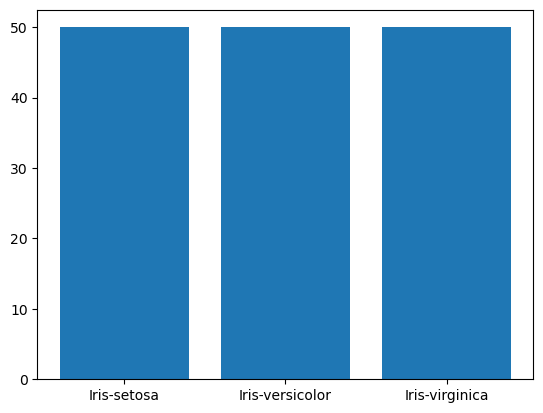

In [81]:
plt.bar(df["Species"].unique(),df["Species"].value_counts())

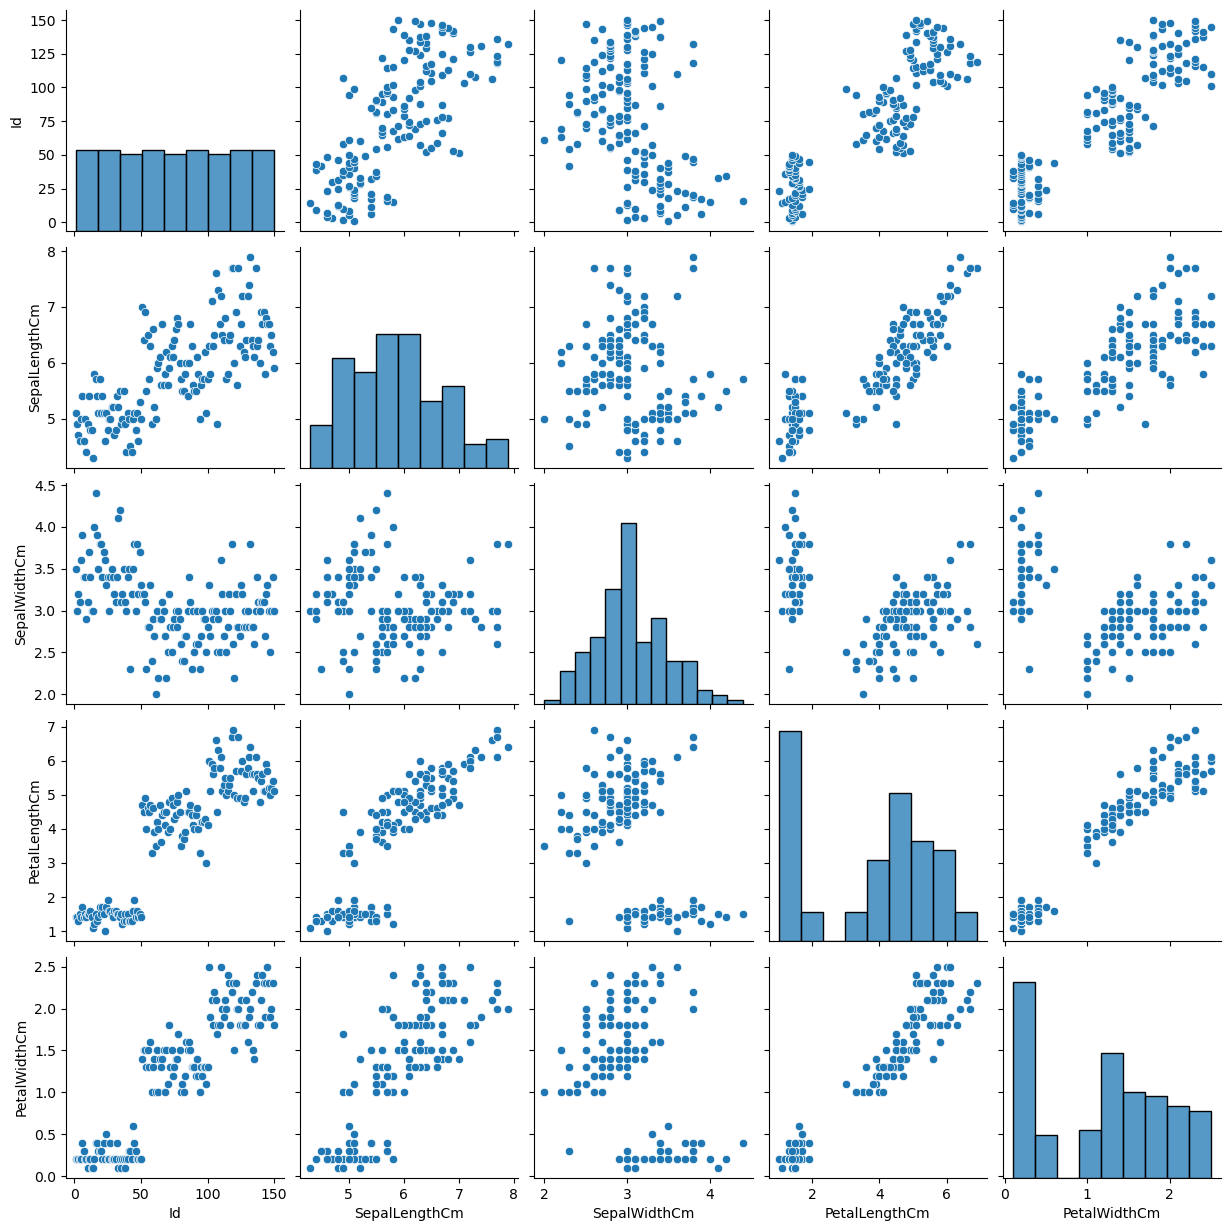

In [82]:
#poltting pairwise visuliazation between each features 
sns.pairplot(df)

<AxesSubplot:>

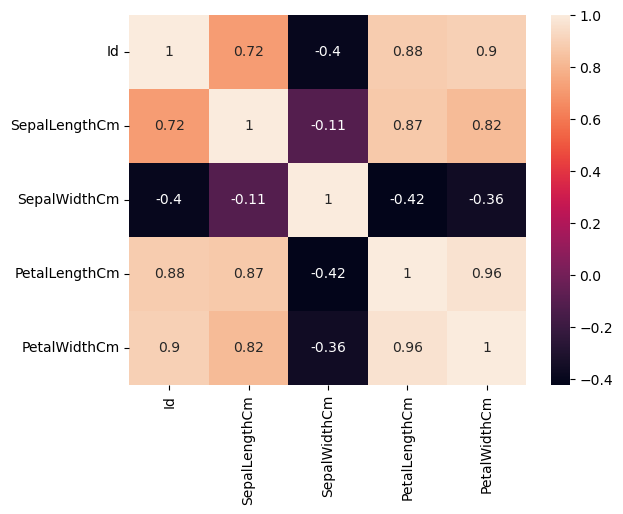

In [83]:
#Heatmaps to visually represent the correlation between variables in a dataset
sns.heatmap(df.corr(),annot=True)

**We can see high corelation btw petal length and petal width =0.96 **

In [84]:
X=df.drop(columns=["Id","Species"])
y=df["Species"]


In [85]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [86]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Logistic Regression Accuracy=",accuracy_score(y_test,y_pred))

Logistic Regression Accuracy= 0.9666666666666667


# lets Now remove some co-related features and outliers

In [88]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8a4e0563d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8a4e056c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8a4e0561d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8a4e062210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a4e062550>,
 'means': []}

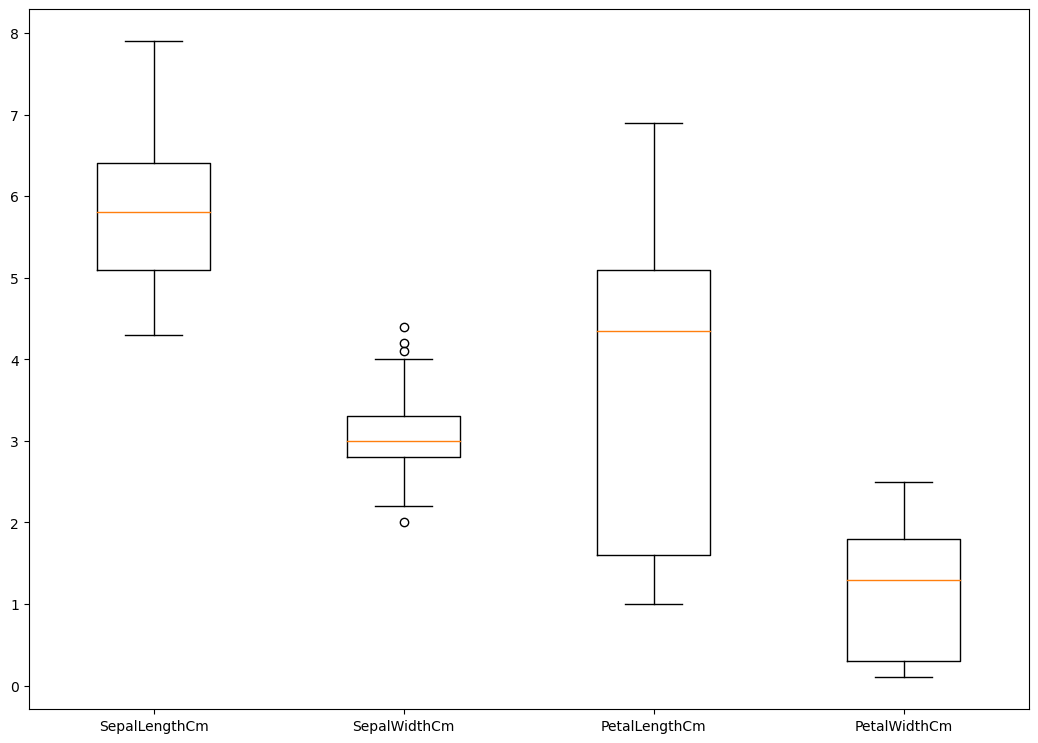

In [89]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.boxplot([df["SepalLengthCm"],df["SepalWidthCm"],df["PetalLengthCm"],df["PetalWidthCm"]],labels=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

**We can see that Sepalwidth has some outlies Lets remove them**

In [90]:
q1=df["SepalWidthCm"].quantile(0.25)
q3=df["SepalWidthCm"].quantile(0.75)
iqr=q3-q1
upper_bound =q3+iqr*1.5
lower_bound =q1-iqr*1.5

In [91]:
df1=df.copy()

In [92]:
# replacing outliers with mean 
df1["SepalWidthCm"]=np.where(df1["SepalWidthCm"]>upper_bound  ,df1["SepalWidthCm"].mean(),df1["SepalWidthCm"] )
df1["SepalWidthCm"]=np.where(df1["SepalWidthCm"]<lower_bound  ,df1["SepalWidthCm"].mean(),df1["SepalWidthCm"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8a4dfa5210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8a4dfa5850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8a4df9ce10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8a4dfa5f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a4dfb0290>],
 'means': []}

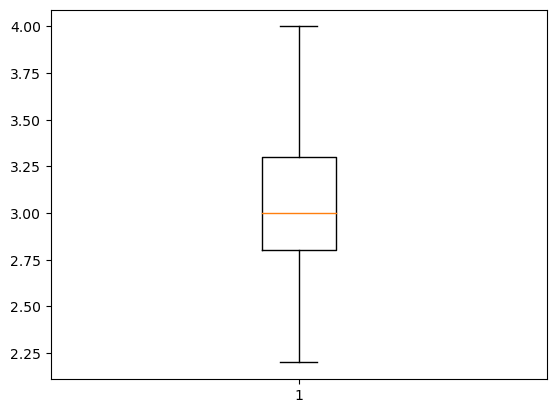

In [93]:
plt.boxplot(df1["SepalWidthCm"])

**Now no Outliers are present in SepalWidthCm Column**

<AxesSubplot:>

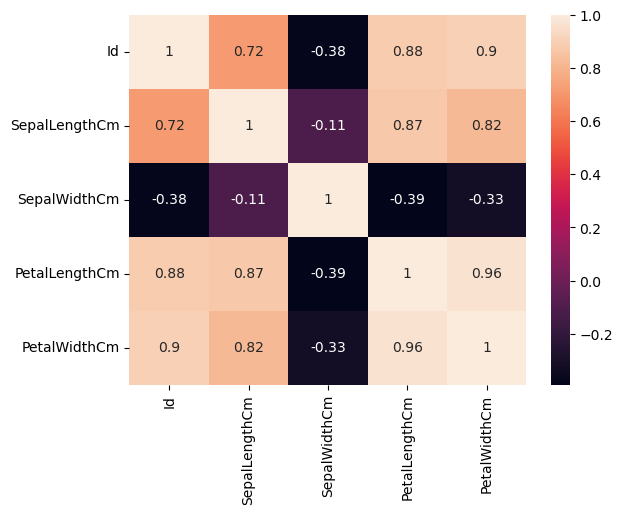

In [94]:
sns.heatmap(df1.corr(),annot=True)

* As we are using Features SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' for our analysis so we can remove highly corelated feature from data
* From above we can see that 'PetalLengthCm', 'PetalWidthCm' has corelation of 0.96 so we can remove one Lets remove 'PetalLengthCm'

In [95]:
df1.drop(columns=['PetalLengthCm'],inplace=True)

<AxesSubplot:>

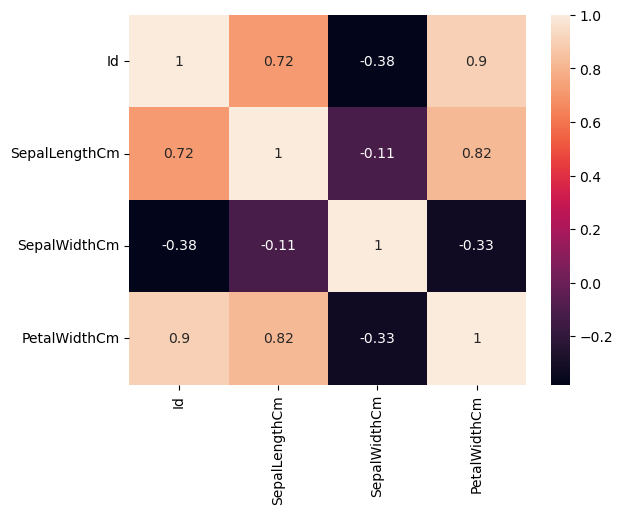

In [96]:
sns.heatmap(df1.corr(),annot=True)

**Now we have Somewhat better co-relation for this case , Generally, a correlation coefficient between 0.3 and 0.7 is considered moderate to strong, while a coefficient below 0.3 is considered weak, and a coefficient above 0.7 is considered very strong. **

# Let's try Logistic Regression Again 

In [97]:
X=df1.drop(columns=["Id","Species"])
y=df1["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [98]:

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Logistic Regression Accuracy for df1=",accuracy_score(y_test,y_pred))

Logistic Regression Accuracy for df1= 0.9333333333333333


We can seew that the accuracy decresed by 3% although we though that it will increse 

# Trying Diffrent Models

In [99]:
X=df.drop(columns=["Id","Species"])
y=df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [100]:
models=["LogisticRegression","DecisionTree","RandomForest","svm"]
for model in models:
    if model=="LogisticRegression":
        ml_model=LogisticRegression()
        ml_model.fit(X_train,y_train)
        y_pred=ml_model.predict(X_test)
        print(f" Accuracy of {model} model is {round(accuracy_score(y_test,y_pred),2)*100}%")
    elif model=="DecisionTree":
        ml_model=DecisionTreeClassifier()
        ml_model.fit(X_train,y_train)
        y_pred=ml_model.predict(X_test)
        print(f" Accuracy of {model} model is {round(accuracy_score(y_test,y_pred),2)*100}%") 
    elif model=="RandomForest":
        ml_model=RandomForestClassifier()
        ml_model.fit(X_train,y_train)
        y_pred=ml_model.predict(X_test)
        print(f" Accuracy of {model} model is {round(accuracy_score(y_test,y_pred),2)*100}%") 
    elif model=="svm":
        ml_model=svm.SVC()
        ml_model.fit(X_train,y_train)
        y_pred=ml_model.predict(X_test)
        print(f" Accuracy of {model} model is {round(accuracy_score(y_test,y_pred),2)*100}%") 
        

 Accuracy of LogisticRegression model is 97.0%
 Accuracy of DecisionTree model is 97.0%
 Accuracy of RandomForest model is 97.0%
 Accuracy of svm model is 97.0%


# Conclusion

**In the given scenario, four different machine learning models, Logistic Regression, Decision Tree, Random Forest, and Support Vector Machines (SVM), were trained and evaluated on the Iris flower dataset. The accuracy of each model is reported as follows:**

**Logistic Regression: 97.0%
Decision Tree: 97.0%
Random Forest: 97.0%
SVM: 97.0%
The Iris flower dataset is a well-known and relatively small dataset, with only four input features and three target classes. Achieving high accuracy on this dataset is relatively easy for most machine learning algorithms, but the relative performance of different algorithms on this dataset can still provide useful insights into their strengths and weaknesses.**

**In this case, we can see that all four models achieved the same high accuracy on the Iris dataset, which suggests that they are all capable of learning the underlying patterns in the dataset and making accurate predictions. However, it's important to note that accuracy alone does not provide a complete picture of a model's performance, and it's necessary to evaluate other metrics such as precision, recall, and F1-score to better understand a model's strengths and weaknesses.**
